This tutorial requires that the WavefrontPropaGator (WPG) package is installed. 

Since the WPG package is a requirement of phenom, we encourage you to install WPG if you wish to use the phenom WPG interface.

You can check your installation of WPG, and the subsequent requirement of SRW as :

In [1]:
import wpg
from wpg import srwlpy as srwl

## Interfacing with WavefrontPropaGator (WPG)
The phenom.wpg script provides the functionalities require to convert the source wavefront files to the WavefrontPropaGator (WPG) format.

Load the source generated in the any of the previous [tutorials](https://twguest.github.io/phenom/examples.html):


### Converting Source Data to a WPG Wavefront
The 'wpg_converter' writes each key of the source to a seperate .h5 file that is WPG readable

In [2]:
from phenom.wpg import wpg_converter
save_loc = "./sase_field.h5" ### master .h5
key =  "pulse000" ### pulse_id 

wfr = wpg_converter(save_loc, key = key)
wfr.store_hdf5("./wpg_sase.h5")

With the pulse wavefront now WPG readable, we can apply in to wavefront propagation simulations:

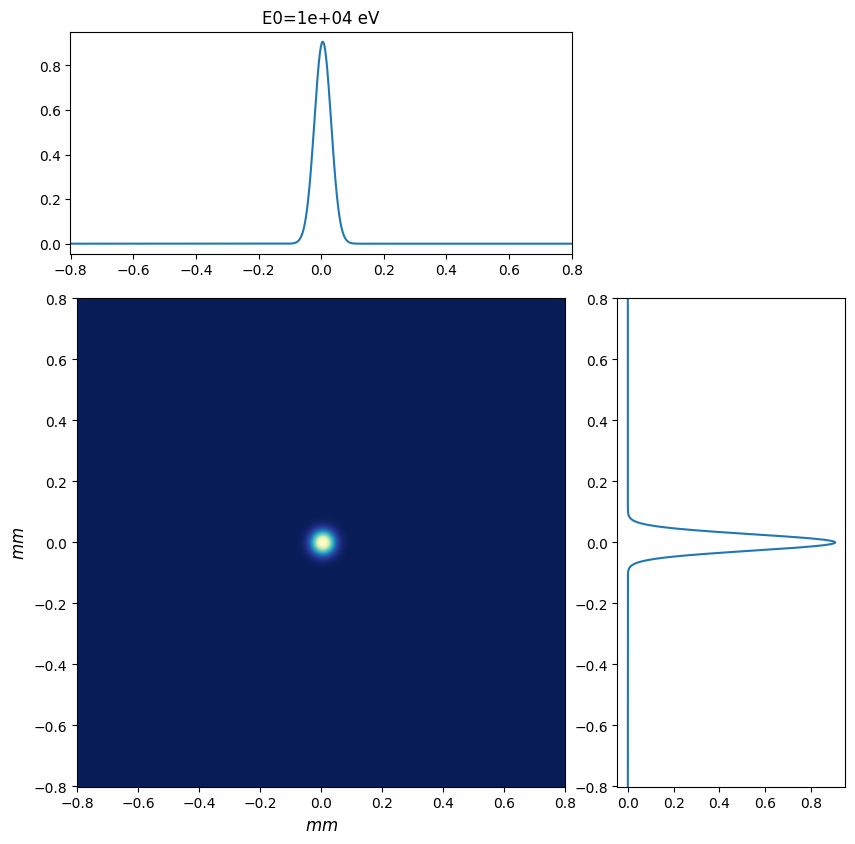

In [3]:
from wpg.beamline import Beamline
from wpg.optical_elements import Drift

from wpg.wpg_uti_wf import plot_intensity_map

wfr.load_hdf5("./wpg_sase.h5")

bl = Beamline()
bl.append(Drift(10), propagation_parameters = [0, 0, 1, 0, 0, 2, 1.0, 2, 1.0, 0, 0, 0])
bl.propagate(wfr)

plot_intensity_map(wfr)

### Converting Multiple Pulses to WPG Wavefronts
We can convert all pulses in a source .h5 to WPG readable wavefronts by iterating of the source .h5:

In [4]:
import h5py as h5
from phenom.wpg import wpg_converter

with h5.File(save_loc) as hf:
    
    for key in list(hf.keys()):
        wfr = wpg_converter(save_loc, key = key)
        wfr.store_hdf5("./wpg_sase_{}.h5".format(key))